In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import pandas as pd
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

In [ ]:
path = '/content/lab9/training '
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'glioma_tumor': 2,
'meningioma_tumor': 3}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])


In [ ]:
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y,
random_state=10, test_size=0.20)



In [ ]:
# Normalize the data (pixel values to 0-1 range)
xtrain = xtrain / 255.0
xtest = xtest / 255.0
sv = SVC(probability=True) # ovr = one-vs-rest
sv.fit(xtrain, ytrain)


SVC(probability=True)

In [ ]:
# Training and Testing scores
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))


Training Score: 0.9359756097560976
Testing Score: 0.8310104529616724


In [ ]:
pred = sv.predict(xtest)
misclassified = np.where(ytest != pred)
print(f"Misclassified samples: {misclassified[0].size}")
print(metrics.classification_report(ytest, pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(ytest, pred))

Misclassified samples: 97
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        91
           1       0.87      0.96      0.91       162
           2       0.82      0.85      0.83       145
           3       0.79      0.74      0.76       176

    accuracy                           0.83       574
   macro avg       0.83      0.82      0.83       574
weighted avg       0.83      0.83      0.83       574

Confusion Matrix:
 [[ 68   7   4  12]
 [  0 156   2   4]
 [  0   4 123  18]
 [ 13  12  21 130]]


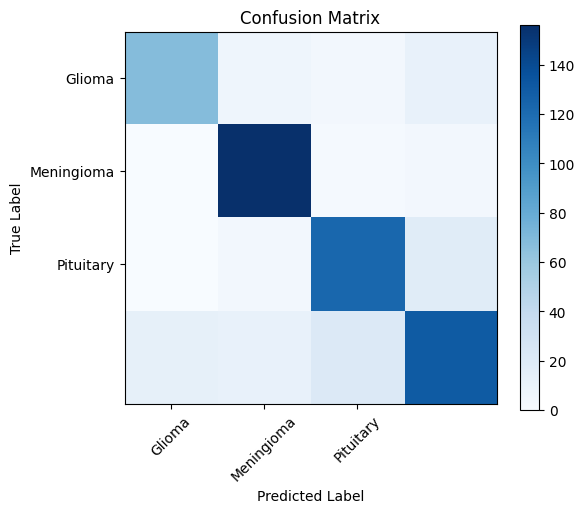

In [ ]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(ytest, pred)
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1, 2], ['Glioma', 'Meningioma', 'Pituitary'],
rotation=45)
plt.yticks([0, 1, 2], ['Glioma', 'Meningioma', 'Pituitary'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
y_pred_prob = sv.predict_proba(xtest)
# Proceed with ROC and AUC calculation for each class
lb = LabelBinarizer()
ytest_bin = lb.fit_transform(ytest)
# Calculate ROC and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
 fpr[i], tpr[i], _ = roc_curve(ytest_bin[:, i], y_pred_prob[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])



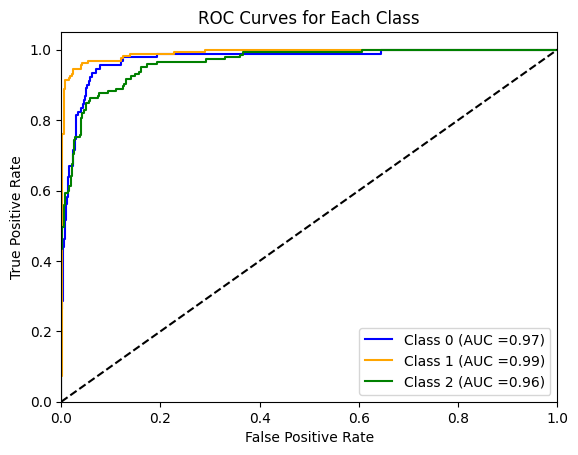

In [ ]:
plt.figure()
colors = ['blue', 'orange', 'green']
for i in range(3):
 plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (AUC ={roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
for kernel in ['linear', 'poly', 'rbf']:
 sv = SVC(kernel=kernel, decision_function_shape='ovr')
 sv.fit(xtrain, ytrain)
 print(f"Kernel: {kernel}")
 print(f"Training Accuracy: {sv.score(xtrain, ytrain)}")
 print(f"Testing Accuracy: {sv.score(xtest, ytest)}")


Kernel: linear
Training Accuracy: 1.0
Testing Accuracy: 0.8101045296167247
Kernel: poly
Training Accuracy: 0.9795296167247387
Testing Accuracy: 0.8362369337979094
Kernel: rbf
Training Accuracy: 0.9359756097560976
Testing Accuracy: 0.8310104529616724


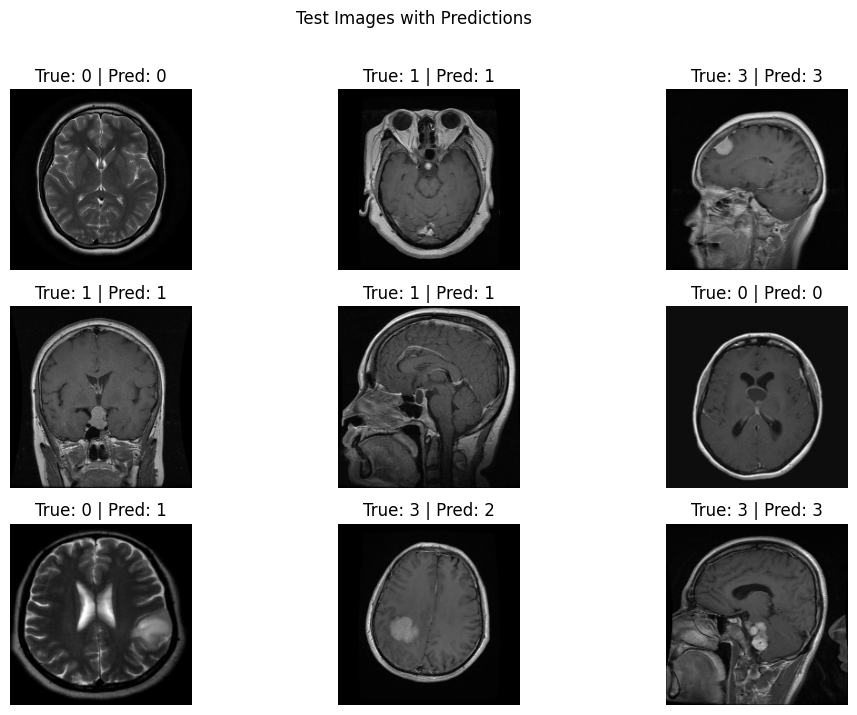

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(9):
 plt.subplot(3, 3, i + 1)
 plt.imshow(xtest[i].reshape(200, 200), cmap='gray')
 plt.title(f"True: {ytest[i]} | Pred: {pred[i]}")
 plt.axis('off')
plt.suptitle("Test Images with Predictions")
plt.show()


Failed to load image: image(68).jpg


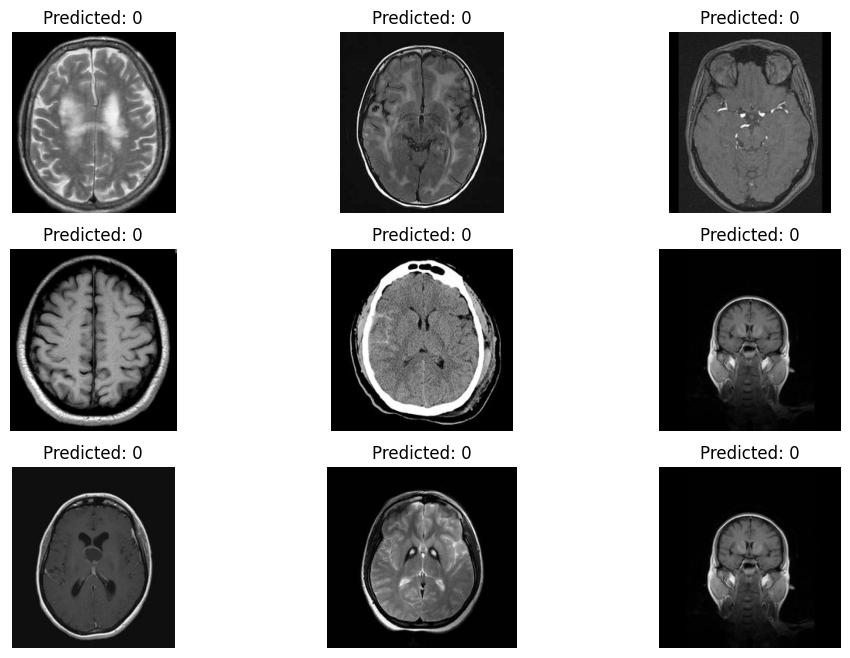

In [ ]:
plt.figure(figsize=(12, 8))
c = 1
path = '/content/lab9/testing/no_tumor'
for i in os.listdir(path)[:9]:
 img = cv2.imread(os.path.join(path, i), 0)
 if img is not None: p=sv.predict(cv2.resize(img, (200, 200)).reshape(1, -1) /255.0)
 plt.subplot(3, 3, c)
 plt.title(f"Predicted: {p[0]}")
 plt.imshow(img, cmap='gray')
 plt.axis('off')
 c += 1
else:
  print(f"Failed to load image: {i}")
plt.show()


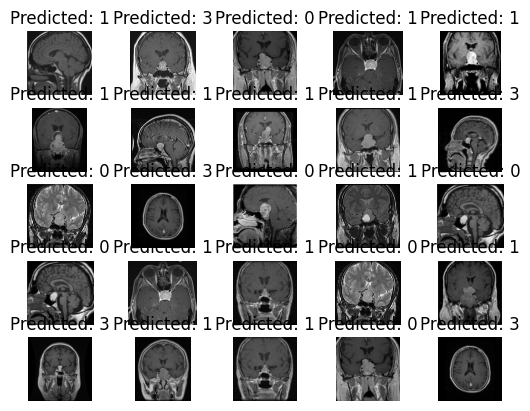

In [ ]:
c = 1
path = '/content/lab9/testing/pituitary_tumor'
for i in os.listdir(path)[:25]:
 img = cv2.imread(os.path.join(path, i), 0)
 if img is not None:
  p = sv.predict(cv2.resize(img, (200, 200)).reshape(1, -1) /255.0)
  plt.subplot(5, 5, c)
  plt.title(f"Predicted: {p[0]}")
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c += 1
 else:
  print(f"Failed to load image: {i}")
plt.show()


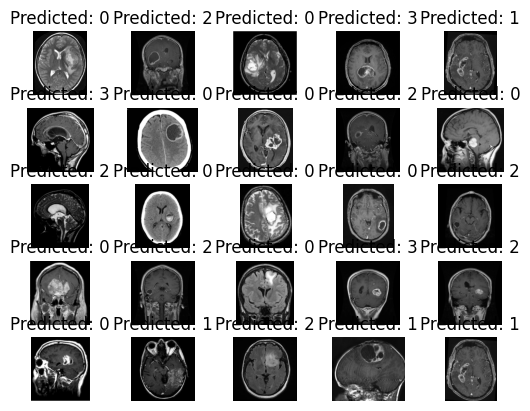

In [ ]:
c = 1
path = '/content/lab9/testing/glioma_tumor'
for i in os.listdir(path)[:25]:
 img = cv2.imread(os.path.join(path, i), 0)
 if img is not None:
  p = sv.predict(cv2.resize(img, (200, 200)).reshape(1, -1) /255.0)
  plt.subplot(5, 5, c)
  plt.title(f"Predicted: {p[0]}")
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c += 1
 else:
   print(f"Failed to load image: {i}")
plt.show()


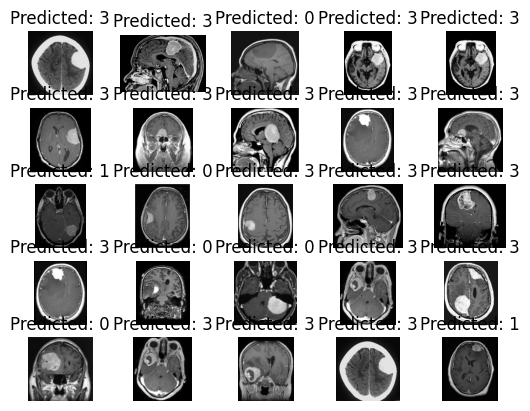

In [ ]:
c = 1
path = '/content/lab9/testing/meningioma_tumor'
for i in os.listdir(path)[:25]:
 img = cv2.imread(os.path.join(path, i), 0)
 if img is not None:
  p = sv.predict(cv2.resize(img, (200, 200)).reshape(1, -1) /255.0)
  plt.subplot(5, 5, c)
  plt.title(f"Predicted: {p[0]}")
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c += 1
 else:
   print(f"Failed to load image: {i}")
plt.show()